# Mô hình phân cụm K-mean

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
import seaborn as sns
from sklearn import metrics
# Đọc dữ liệu từ file CSV
data = pd.read_csv(r'../data.csv')
data = data.drop(columns='Title')
# Hiển thị kích thước và thông tin của dữ liệu
print(data.shape)
data.info()
data.head()


(732, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price sale        732 non-null    float64
 1   CPU               732 non-null    float64
 2   Ram               732 non-null    float64
 3   Storage           732 non-null    float64
 4   Operating system  732 non-null    float64
 5   Brand             732 non-null    float64
 6   Screen size       732 non-null    float64
 7   discount          732 non-null    float64
dtypes: float64(8)
memory usage: 45.9 KB


,Price sale,CPU,Ram,Storage,Operating system,Brand,Screen size,discount
0,0.069532,0.7,0.011765,0.098592,1.0,0.125,0.557522,0.114894
1,0.111426,0.1,0.011765,0.098592,1.0,0.750,0.628319,0.127660
2,0.077640,0.7,0.011765,0.098592,1.0,0.500,0.557522,0.072340
3,0.070883,0.8,0.011765,0.098592,1.0,0.000,0.628319,0.106383
4,0.118184,0.8,0.011765,0.098592,1.0,0.500,0.526549,0.106383



## Tách dữ liệu thành tập huấn luyện và tập kiểm tra (80% - 20%)

In [16]:

train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

train_data.to_csv('../train_data.csv', index=False)
test_data.to_csv('../test_data.csv', index=False)

In [17]:

data_train = pd.read_csv('../train_data.csv')
print(data_train.shape)

data_test = pd.read_csv('../test_data.csv')
print(data_test.shape)

(585, 8)
(147, 8)


chọn đặc trưng

In [18]:
columns_to_scale = ['Price sale', 'CPU', 'Ram', 'Storage', 'Screen size', 'Operating system', 'Brand','discount']

chọ K là số cụm bằng Elbow

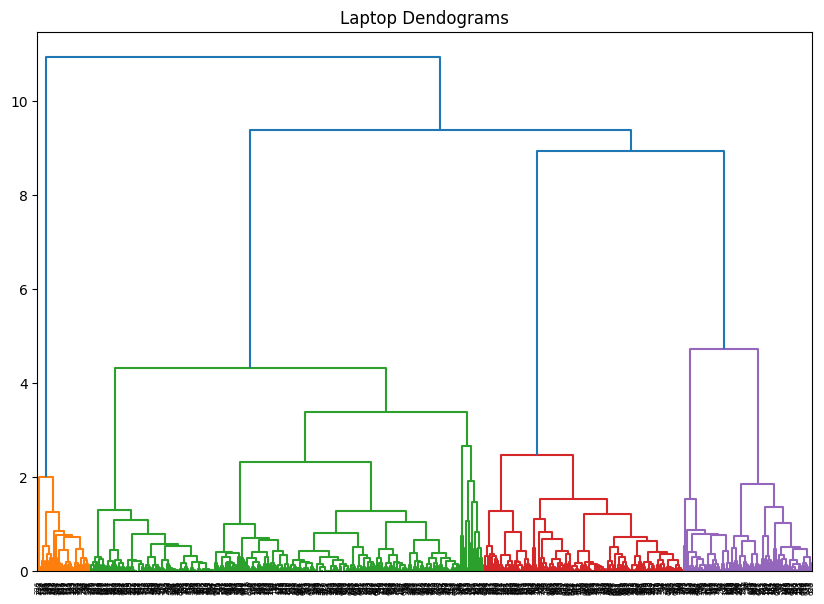

In [19]:
plt.figure(figsize=(10, 7))  
plt.title("Laptop Dendograms")  
dend = shc.dendrogram(shc.linkage(data, method='ward')) 

In [32]:
inertia_values = []
for k in range(2,15):
    cluster = AgglomerativeClustering(n_clusters=k, linkage='ward')
    cluster.fit_predict(data) 
    print (k, metrics.calinski_harabasz_score(data,cluster.labels_))
    

2 289.0842194198501
3 354.81246975859557
4 522.2160171880956
5 505.4950961593695
6 513.661366697687
7 504.8984873707607
8 482.86774762117443
9 467.99329135623844
10 457.81814413957363
11 444.32871069138986
12 434.80089195024385
13 428.2707526279853
14 416.188963420807


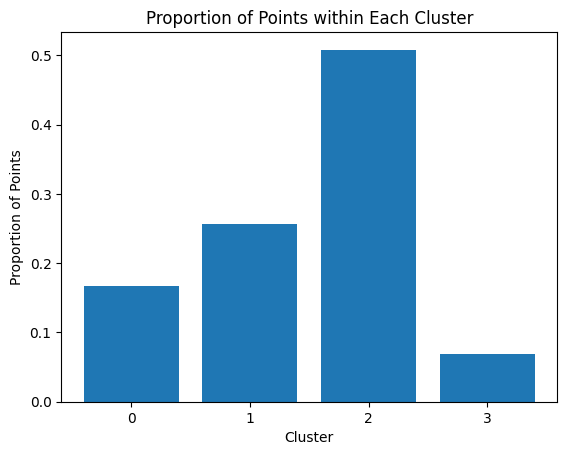

In [36]:
cluster = AgglomerativeClustering(n_clusters=4, linkage='ward')
cluster_labels = cluster.fit_predict(data)

# Get the count of points in each cluster
cluster_counts = np.bincount(cluster_labels)

# Plot the proportion of points within each cluster
plt.bar(range(4), cluster_counts / len(data), align='center')
plt.xlabel('Cluster')
plt.ylabel('Proportion of Points')
plt.title('Proportion of Points within Each Cluster')
plt.xticks(range(4))
plt.show()

huấn luyện mô hình